# Final COMP 680

 Holly Do

In [2]:
# %load ../include.py
#
#
import random as rnd
import math as mth
import statistics as sts
import numpy as np
import scipy as sci
import scipy.linalg as la
import scipy.stats as st
import scipy.special as spp
import matplotlib.pyplot as plt
import sympy as sy
#!pip install stemgraphic # this is needed in Google Collaboratory
import stemgraphic as stm
import itertools as it
import operator as op


# 1. B

In [9]:
a = np.array([[70, 36,43,69,82,48,34,62,35,15,59, 139, 46, 37, 42, 30, 55, 56, 36, 82, 38, 89, 54, 25, 35, 24, 22, 9, 56, 19]])
n= 30
mean = np.mean(a)
var = np.var(a, ddof=1)
print(mean,var)

# Using sample's first and second moments we have the equation
# mean = alpha/lamda
# var = alpha/(lamda**2)
# var = 48.23/lamda
lamda = mean / var
alpha = mean * lamda
print("Alpha", alpha, "Lamda", lamda)

48.233333333333334 703.1505747126437
Alpha 3.3086148658773347 Lamda 0.06859602348052525


# 2.

A random sample of 40 households in a country Omega was selected as part of a study on electricity usage, and the number of kilowatt-hours (kWh) was recorded for each household in the sample for the first quarter of 2022. The average usage was found to be 310 kWh. In a very large study in the first quarter of the previous year, it was found that the standard deviation of the usage was 89 kWh.

Assuming the standard deviation is unchanged and that the usage is normally distributed, provide an expression for calculating a 95% confidence interval for the mean usage in the first quarter of 2022.

Given:
* Large sample size > 30
* Unknown population standard deviation

Formula to use : T distribution

In [5]:
xbar = 310
ssig = 89
n = 40
alpha = 1-0.95

def t_CI(xbar,sample_std,n,alpha):
    '''
    Use t scoring for CI
    '''
    factor = abs(st.t(n-1).ppf(alpha/2)*(sample_std/mth.sqrt(n))) #difference is (n-1)
    return (xbar - factor, xbar+factor)


t_CI(xbar,ssig,n,alpha)

(np.float64(281.53641912113335), np.float64(338.46358087886665))

A 95% confidence interval for the mean usage in the first quarter of 2022 is (281.54, 338.47)

# 3.

The development office and the registrar have provided you with anonymous matches of starting salaries and GPAs for 108 graduating computer science majors. Your sample contains a variety of jobs, from church pastor to stockbroker.

(7 pts) The average starting salary for the 108 students was  $38,644 with a standard deviation of $7,541. Construct a 90% confidence interval for the true mean starting salary of all economics majors at your university.
(8 pts) You wonder if it pays to get good grades by calculating the average salary for computer science majors who graduated with a cumulative GPA of B+ or better, and those who had a B or worse. The data is as shown in the following table.

Your friend claims that very high GPA secures higher starting salaries in the population. Conduct the appropriate hypothesis test, state clearly your null and alternative hypothesis, find the p-value and specify clearly whether your analysis support or not your friend's claim and a what statistical significance level.

# 3.1

Given:
* Large sample size > 30
* Given population standard deviation

Formula to use : Z distribution

In [7]:
# Confidence interval of Z distribution
def z_CI(xbar,sigma,n,alpha):
    '''
    xbar is the estimate for mu
    sigma is the standard deviation
    alpha is the significance level
    '''
    factor = abs(st.norm.ppf(alpha/2)*(sigma/mth.sqrt(n)))
    return (xbar - factor, xbar+factor)

In [79]:
xbar = 38644
sigma = 7541
n = 108
alpha = 1 - .9
lo,hi = z_CI(xbar,sigma,n,alpha)
lo,hi

(np.float64(37450.43982395151), np.float64(39837.56017604849))

90% confidence interval for the true mean starting salary of all economics majors at your university is (37450, 39838)

# 3.2

Setup for Hypothesis Test: This is t-test With Unequal Variance (test difference of means) one sided test. 

$H_0: mean_b - mean_c = 0 

$H_A: mean_b - mean_c > 0 


In this unequal-variance case, the degrees of freedom for the t-test is given by the Satterthwaite formula
>$
   \nu = \dfrac{\left(\dfrac{s_X^2}{n} + \dfrac{s_Y^2}{m}\right)^2}
   {\dfrac{s_X^4}{n^2\,(n-1)} + \dfrac{s_Y^4}{m^2\,(m-1)}}
$

In [7]:
mu_b = 39915
mu_c = 37083

b_var = 8330**2
c_var = 6174**2
nb = 59
nc = 49

## pooled sample variance
sig = mth.sqrt((b_var/nb) + (c_var/nc))

tstat = (mu_b - mu_c)/sig

dftop = ((b_var/nb) + (c_var/nc))**2 
dfbottom = ((b_var**2) / ((nb**2)*(nb-1))) + ((c_var**2) / ((nc**2)*(nc-1)))
df = dftop/dfbottom
print(df)

pval = 1-st.t(df).cdf(tstat)
pval

104.73464540220431


np.float64(0.022655816329638978)

With p value of 2.3%, less than standard alpha 5%, there is sufficient evidence to reject the null hypothesis meaning your friend can claim that very high GPA secures higher starting salaries in the population.

# 4.

We know that labor hours per day is a random variable distributed as 
.  We have a random sample of the following observations:

12, 11, 14, 10, 9, 9, 8

a. (5 pts) Find a confidence interval for the mean 
 at the 95% confidence level.

b. (5 pts) Find a confidence interval for 
 and 
 at the 5% significance level.

c. (10 pts) Suppose we take a second random sample, and we get

10, 9, 7, 15, 6, 14, 6

With 95% confidence level, can we affirm that the variance of the first sample is lower than the second one? [Hint. Calculate the p-value]

# 4.a

Given:
* Small sample size < 30
* Not given population standard deviation

Formula to use : T distribution

In [64]:
hours = np.array([12, 11, 14, 10, 9, 9, 8])
xbar = np.mean(hours)
ssig = np.std(hours, ddof=1)
n = len(hours)
alpha = 1-0.95

print(xbar, ssig, n)

def t_CI(xbar,sample_std,n,alpha):
    '''
    Use t scoring for CI
    '''
    factor = abs(st.t(n-1).ppf(alpha/2)*(sample_std/mth.sqrt(n))) 
    return (xbar - factor, xbar+factor)


t_CI(xbar,ssig,n,alpha)

10.428571428571429 2.0701966780270626 7


(np.float64(8.513958832715968), np.float64(12.34318402442689))

The confidence interval for the mean at the 95% confidence level is ( 8.513958832715968, 12.34318402442689 )

# 4.b

In [3]:
hours = np.array([12, 11, 14, 10, 9, 9, 8])
n = len(hours)
mean = np.mean(hours)

#sum of square of difference
s2 = (12-mean)**2 + (11-mean)**2 + (14 - mean)**2 + (10-mean)**2 + (9-mean)**2 + (9 - mean)**2 + (8 - mean)**2 
dof = n-1
alpha = 0.05

#chi square values at alpha
chi2_low = st.chi2.ppf(alpha/2, dof)
chi2_hi = st.chi2.ppf(1 - alpha/2, dof)
print(chi2_low, chi2_hi)

# CI values from sum of square of dif / chi square
low = mth.sqrt(s2/chi2_hi)
hi =  mth.sqrt(s2/chi2_low)
print(low, hi)

1.2373442457912027 14.44937533544792
1.3340210924441342 4.558709951559156


In [73]:
low_var = (s2/chi2_hi)
hi_var = (s2/chi2_low)
print(low_var, hi_var)

1.7796122750858416 20.781836422444485


Confidence interval for standard deviation at the 5% significance level: (1.3339922576796257 4.553825555391873)

Confidence interval for varianace at the 5% significance level: (1.7795353435491847 20.737327188940096)

# 4.c


Setup for Hypothesis Test: This is a F test for comparing two variances. 

$H_0:  var_2 / var_1 = 1  
$H_A:  var_2 / var_1 > 1  

In [78]:
hours = np.array([12, 11, 14, 10, 9, 9, 8])
hours2 = np.array([10, 9, 7, 15, 6, 14, 6])

xbar_1 = np.mean(hours)
xbar_2 = np.mean(hours2)

len_1 = len(hours)
len_2 = len(hours2)

ssq_1 = np.var(hours, ddof=1)
ssq_2 = np.var(hours2, ddof=1)

# f observed value is
fobs = (ssq_2/ssq_1)

# F distribution with degree len_1-1,len_2-1 
dist = st.f(len_2-1,len_1-1)

p1 = dist.cdf(fobs)

p2 = 1-dist.cdf(fobs) # P(F>=Fobs)

print(f'The left-sided P-value = {p2}')

The left-sided P-value = 0.09261525343460231


With 95% confidence level, P value is 9%, higher than alpha of 5%, we cannot reject the null hypothesis and  there is not enough evidence that the variance of the first sample is lower than the second one. 

# 5  

Assess the evidence that student goals are independent of student gender.

This should be the test of independence using chi square statistic. 

Setup for Hypothesis Test:

- $H_0:$ prob(any response$|$vendor) = prob(any resp)  

- $H_A:$ There is some response $res$ s.t. p($res$ $|$ vendor) $\neq$ $p(res)$

In [ ]:
# input data
B = np.array([117, 50, 60])
G = np.array([130, 91, 30])

# total number of boys, and total number of girls
nB,nG = np.sum(B),np.sum(G)

# grand total
total = nB + nG
print(nB,nG,total)

# total number of each goal 
nGoal = B + G
print('Total by goal are', nGoal)

# expect of each (i,j) is nB * nGoal / total
expB = (nB*nGoal)/total
expG = (nG*nGoal)/total
print('Exp_B is',expB,'Exp_G is',expG)

# chi square of B ans chi square of G
ssqB = np.sum((B - expB)**2/expB)
ssqG = np.sum((G - expG)**2/expG)
print(ssqB,ssqG)

#final chi square is sum 
chi2obs = ssqB + ssqG

## remember that  dof = (#col - 1) * (nrows - 1)
dof = (len(B) - 1) * (len(G) - 1)

pval = 1 - st.chi2(dof).cdf(chi2obs)

print(f'The Chi2_obs is = {chi2obs}', f'| The p-value = {pval}')

227 251 478
Total by goal are [247 141  90]
Exp_B is [117.29916318  66.96025105  42.74058577] Exp_G is [129.70083682  74.03974895  47.25941423]
11.266257545635575 10.189005828124603
The Chi2_obs is = 21.45526337376018 | The p-value = 0.00025719295764514705


P_value is close to zero so there is sufficient evidence to reject the null hypothesis and accept that student goals are not independent of student gender. 

# 6

0 2 4 6 8 10 12 14 16 18 20 22


7.5 10.3 12.7 14.9 16.8 18.5 19.9 21.3 22.5 23.6 24.5 25.2

Construct a scatter plot of the weight data, and find the correlation coefficient between the two variables.
b. (10 pts) Perform a simple linear regression of weight on age:


i.e., fit the coefficients of such linear model to the data. Then, compute the 
 measure of fit for your model. Plot the data and the regression line.
c. (5 pts)  Find a quadratic model that best fits the data. Give the coefficients, compute and compare the 
 with the previous model. Plot the data and the new regression line.
d. (5 pts) Predict the weight at 24 months using both the linear model and the quadratic model.

# 6.a

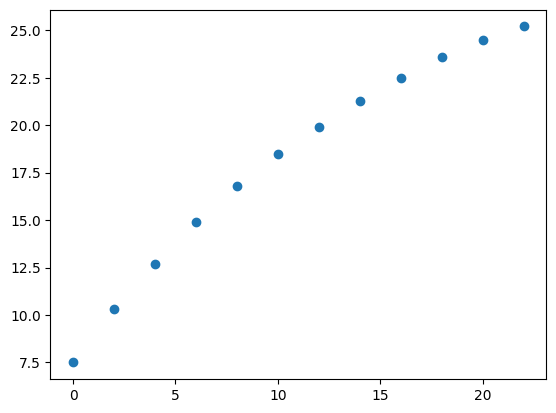

In [56]:
age = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
weight = np.array([7.5, 10.3, 12.7, 14.9, 16.8, 18.5, 19.9, 21.3, 22.5, 23.6, 24.5, 25.2]) 

# draw scatter plot
_ = plt.scatter(age ,weight)

sample covariance & sample correlation coefficent
>$
  r = \dfrac{\operatorname{Cov}(X,Y)}{s_X s_Y}
$

In [57]:
# sample covariance
scov = np.cov(age, weight )[0,1]
print(scov)

# sample correlation coefficent 
sample_r = scov/(np.std(age ,ddof=1)*np.std(weight ,ddof=1))
print(sample_r)

41.06363636363637
0.9833409507486053


# 6.b

In [58]:
#construct regression linear system
A=[ [a, 1] for a in age ]

#coef
coef, *_ = la.lstsq(A, weight)

print("Coef B0:", coef[1])
print("Coef B1:", coef[0])

mean_weight = np.mean(weight)

# Calculate predicted y values
y_pred = [coef[0] * a + coef[1] for a in age]

# Calculate sum of square of dif between predicted and mean
ss_reg = np.sum((y_pred - mean_weight) ** 2)  

# Calculate sum of square of dif between real values and mean
ss_total = np.sum((weight - mean_weight) ** 2)  

# R square value 
r2 = ss_reg / ss_total 
print(f"R-squared: {r2}")

Coef B0: 9.455128205128204
Coef B1: 0.7896853146853149
R-squared: 0.9669594254191709


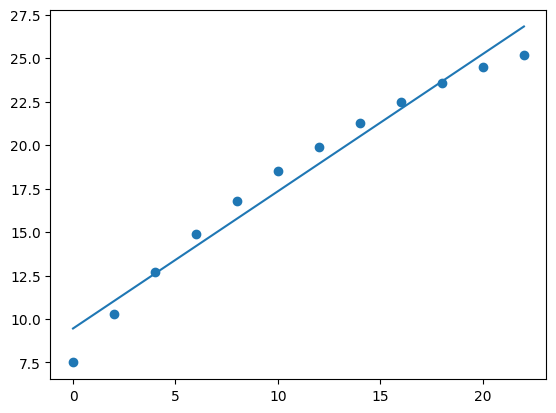

In [59]:
_ = plt.scatter(age ,weight)
_ = plt.plot(age, y_pred)

In [61]:
result_24 = coef[0] * 24 + coef[1] 
result_24

np.float64(28.407575757575763)

The weight at 24 months using the linear model is 28.4

# 6.c

In [ ]:
#construct regression linear system
A=[ [a**2, a, 1] for a in age ]

#coef
coef, *_ = la.lstsq(A,weight)

print("Coef 1:", coef[0])
print("Coef 2:", coef[1])
print("Coef 3:", coef[2])

# Calculate predicted y values
y_pred = [coef[0] * a**2 + coef[1] * a + coef[2] for a in age]

# Calculate sum of square of dif between predicted and mean
ss_reg = np.sum((y_pred - mean_weight) ** 2)  

# Calculate sum of square of dif between real values and mean
ss_total = np.sum((weight - mean_weight) ** 2)

r2 = ss_reg / ss_total 
print(f"R-squared: {r2}")

Coef 1: -0.023720029970029897
Coef 2: 1.3115259740259761
Coef 3: 7.715659340659329
R-squared: 0.9995301456603155


R-squared in 6.b is : 0.9669594254191709

R-squared in 6.c is : 0.9995301456603155 > than R square in 6.b suggests 6.c is a better fit regression than 6.b.

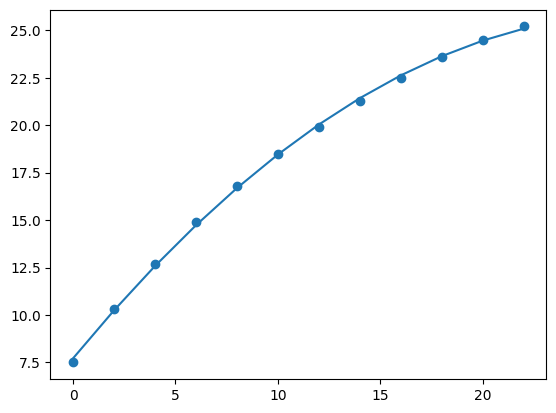

In [53]:
_ = plt.scatter(age ,weight)
_ = plt.plot(age, y_pred)

In [54]:
result_24 = coef[0] * 24**2 + coef[1] * 24 + coef[2]
result_24

np.float64(25.529545454545538)

The weight at 24 months using the quadratic model is 25.5

# 7

[BONUS] (10 pts) A logistic company ships packages in containers. Suppose that each package weights 
 kilograms, a random variable that follows an exponential distribution with parameter 
. If the company has to load a container with 
 packages, what is the probability that the total weight is greater than or equal than 210 kilograms?

The probablity distribution discussed is Gamma with k =100 and theta = 1/lamda. 

In [4]:
k = 100
lamda = 1/2
theta = 1/lamda
dist = st.gamma(a=k, scale=1/theta) 
e = k * theta
print(e, theta)
# probabilty that weight is greater or equal to 210 kilograms
1-dist.cdf(210)

200.0 2.0


np.float64(0.0)

Probabilty that weight is greater or equal to 210 kilograms is close to zero.